In [37]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 훈련 데이터에서 가장 자주 나타나느 단어 1만 개만 사용하겠다는 의미

In [64]:
len(test_labels)
len(test_data[2])
test_data[1]

[1,
 14,
 22,
 3443,
 6,
 176,
 7,
 5063,
 88,
 12,
 2679,
 23,
 1310,
 5,
 109,
 943,
 4,
 114,
 9,
 55,
 606,
 5,
 111,
 7,
 4,
 139,
 193,
 273,
 23,
 4,
 172,
 270,
 11,
 7216,
 2,
 4,
 8463,
 2801,
 109,
 1603,
 21,
 4,
 22,
 3861,
 8,
 6,
 1193,
 1330,
 10,
 10,
 4,
 105,
 987,
 35,
 841,
 2,
 19,
 861,
 1074,
 5,
 1987,
 2,
 45,
 55,
 221,
 15,
 670,
 5304,
 526,
 14,
 1069,
 4,
 405,
 5,
 2438,
 7,
 27,
 85,
 108,
 131,
 4,
 5045,
 5304,
 3884,
 405,
 9,
 3523,
 133,
 5,
 50,
 13,
 104,
 51,
 66,
 166,
 14,
 22,
 157,
 9,
 4,
 530,
 239,
 34,
 8463,
 2801,
 45,
 407,
 31,
 7,
 41,
 3778,
 105,
 21,
 59,
 299,
 12,
 38,
 950,
 5,
 4521,
 15,
 45,
 629,
 488,
 2733,
 127,
 6,
 52,
 292,
 17,
 4,
 6936,
 185,
 132,
 1988,
 5304,
 1799,
 488,
 2693,
 47,
 6,
 392,
 173,
 4,
 2,
 4378,
 270,
 2352,
 4,
 1500,
 7,
 4,
 65,
 55,
 73,
 11,
 346,
 14,
 20,
 9,
 6,
 976,
 2078,
 7,
 5293,
 861,
 2,
 5,
 4182,
 30,
 3127,
 2,
 56,
 4,
 841,
 5,
 990,
 692,
 8,
 4,
 1669,
 398,
 229,
 10,


In [66]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key)for(key,value)in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?')for i in train_data[0]])

1646592/1641221 [==============================] - 3s 2us/step


In [67]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [19]:
max([max(sequence) for sequence in train_data])

9999

In [20]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [76]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [77]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [78]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
paritial_y_train = y_train[10000:]

In [79]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history=model.fit(partial_x_train,
paritial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.6051 - acc: 0.7715 - val_loss: 0.5244 - val_acc: 0.8366
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.4476 - acc: 0.8851 - val_loss: 0.4132 - val_acc: 0.8655
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3423 - acc: 0.9049 - val_loss: 0.3414 - val_acc: 0.8837
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.2682 - acc: 0.9203 - val_loss: 0.3008 - val_acc: 0.8892
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2165 - acc: 0.9316 - val_loss: 0.2817 - val_acc: 0.8903
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1808 - acc: 0.9427 - val_loss: 0.2765 - val_acc: 0.8893
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1549 - acc: 0.9527 - val_loss: 0.2745 - 

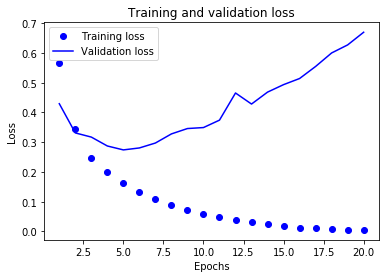

In [80]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dick['loss']
val_loss = history_dick['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

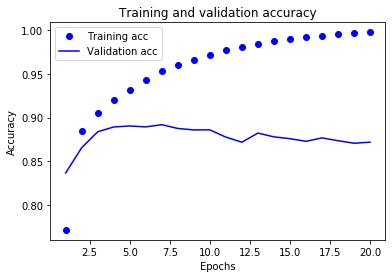

In [81]:

plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

점선은 훈련 손실과 정확도이고 실선은 검증 손실과 정확도입니다. 신경망의 무작위한 초기화 때문에 사람마다 결과거 조금 다를 수 있습니다.

여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다. 검증 손실과 정확도는 이와 같지 않습니다. 4번째 에포크에서 그래프가 역전되는 것 같습니다. 이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례입니다. 정확한 용어로 말하면 과대적합되었다고 합니다. 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다.

이런 경우에 과대적합을 방지하기 위해서 3번째 에포크 이후에 훈련을 중지할 수 있습니다. 일반적으로 4장에서 보게 될 과대적합을 완화하는 다양한 종류의 기술을 사용할 수 있습니다.

처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠습니다:

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.4746 - accuracy: 0.8196
Epoch 2/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2765 - accuracy: 0.9064
Epoch 3/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2115 - accuracy: 0.9258
Epoch 4/4
25000/25000 [==============================] - 6s 225us/step


In [35]:

results

[0.2882620505142212, 0.8861200213432312]

In [36]:
model.predict(x_test)

array([[0.21482122],
       [0.99916065],
       [0.8971229 ],
       ...,
       [0.13103008],
       [0.11140782],
       [0.62936825]], dtype=float32)